<a href="https://colab.research.google.com/github/rootloginson/X-Ray-Image-Covid19-Detection-Project/blob/master/Final/Main%20Notebook/Main_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## It'll look better and intuitive on G◕‿◕gle Colab Environment ✿

---

In [ ]:
# This part probably will be enough for utilizing Drive in Colab
# but examine links above if you encounter with problems.
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# *Import Libraries and path

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from torchvision import models
import os 

In [ ]:
# Working Directory path
wd = '/content/drive/MyDrive/Colab Notebooks/Final'
# All but key 0 have signs of inflammation.
label_dict = {0:'Normal', 1:'Bacteria', 2:'Virus', 3:'Covid19', 4:'Sars, Virus', 5:'Strept., Bacteria', 6:'Stress Smoking'}

# *Processed Dataframe (--check point)
for processsed dataframe call ***get_processedDataframe()*** function

for processsed test2 file dataframe call ***get_test2Dataframe()*** function
for processsed test2 file dataframe call ***get_test3Dataframe()*** function

for kaggle dataframe ***get_kaggleDataframe()*** function


In [ ]:
def get_processedDataframe():
  #already sorted
  checkpoint = pd.read_csv(wd+'/KaggleCovid/Updated_Data_Frames/processed_dataset.csv', index_col=0)
  return checkpoint

def get_test2Dataframe():
  checkpoint = pd.read_csv(wd+'/KaggleCovid/Updated_Data_Frames/processed_dataset_test2.csv')
  return checkpoint

def get_test3Dataframe():
  checkpoint = pd.read_csv(wd+'/KaggleCovid/Updated_Data_Frames/processed_dataset_test3.csv')
  return checkpoint

#Source: https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset/metadata
def get_kaggleDataframe():
  kaggle_df = pd.read_csv(wd + '/KaggleCovid/Coronahack_csv/Chest_xray_Corona_Metadata.csv', index_col=0)
  kagge_df = kaggle_df.set_index('X_ray_image_name').sort_index()
  return kaggle_df

In [ ]:
train_test_dataframe = get_processedDataframe()
train_test_dataframe.head()

,Dataset_type,Class,Channel_dim
X_ray_image_name,,,
01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,TRAIN,3,3
1-s2.0-S0140673620303706-fx1_lrg.jpg,TRAIN,3,3
1-s2.0-S0929664620300449-gr2_lrg-a.jpg,TRAIN,3,3
1-s2.0-S0929664620300449-gr2_lrg-b.jpg,TRAIN,3,3
1-s2.0-S0929664620300449-gr2_lrg-c.jpg,TRAIN,3,3


---
Covid19 Images 

><font color='gray'>**GRAY**</font>  = **4**

><font color='PaleVioletRed'>**R**</font><font color='90EE90'>**G**</font><font color='00BFFF'>**B**</font> = **46**

><font color='PaleVioletRed'>**R**</font><font color='90EE90'>**G**</font><font color='00BFFF'>**B**</font>
<font color='Black'>- A</font> = **8**

In [ ]:
train_test_dataframe.loc[train_test_dataframe['Class']==3].value_counts('Channel_dim')

Channel_dim
3    46
4     8
1     4
dtype: int64

## Move files around

### Find out which file the image is in.
``` python
def whereIsImage(img_name, dir1='train', dir2='test', path=wdt):
  returns (train=boolean, test=boolean)

# working directory of 'train' and 'test' file
wdt = '/content/drive/MyDrive/Colab Notebooks/KaggleCovid/Coronahack-Chest-XRay-Dataset'
```

In [ ]:
# working directory of 'train' and 'test' file
wdt = '/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/Coronahack-Chest-XRay-Dataset'

def whereIsImage(img_name, dir1='train', dir2='test', path=wdt):
  """.../FileName

    child parent of FileName should be "train" and "test"
    dir1 = train
    dir2 = test
  """

  # image train path
  p_dir1 = path + '/' + dir1 + '/' + img_name
  # image test path
  p_dir2 = path + '/'+ dir2 + '/' + img_name

  flag_dir1 = False
  flag_dir2 = False

  if os.path.exists(p_dir1):
    flag_dir1 = True
  # check if file in test directory
  if os.path.exists(p_dir2):
    flag_dir2 = True

  print("Image inside>",dir1, flag_dir1)
  print("Image inside>", dir2, flag_dir2)
  return (flag_dir1, flag_dir2)

### Move Images, Check file location, Reset
```python
def mvFileAround(img_name, current_dir, target_dir, path=wdt):

def compareKaggleCustom(custom_dataframe, reset=False):

def whereIsImage(img_name, dir1='train', dir2='test', path=wdt):

```

In [ ]:
def mvFileAround(img_name, current_dir, target_dir, dataframe, path=wdt):
  """
  path contains train and test.
  .../FilePath/current_dir
  .../FilePath/target_dir
  path = .../FilePath

  current_dir(str), target_dir(str)

  Initial state codes: 
  p11 - file was exist in both dir.
  p10 - file was exist in current_dir.
  p01 - file was already exist in target dir.
  p00 - There was no file in current and target dir. 
  p-1 - Unknown error

    returns img_name, (img_name, prev_statecodes, success(boolean))
  """
  assert current_dir != target_dir,'current_dir and target_dir are same'

  current_dir = current_dir.lower()
  target_dir = target_dir.lower()

  flag_current = False
  flag_target = False

  # image current path
  cp = path + '/' + current_dir + '/' + img_name
  # image target path
  tp = path + '/'+ target_dir + '/' + img_name
  # check if file in train directory 

  if os.path.exists(cp):
    flag_current = True
  # check if file in test directory
  if os.path.exists(tp):
    flag_target = True

  #control after file operation
  def returnCheck(cp, tp):
    # if not exist in current and exist in target return True, else False
    if not os.path.exists(cp):
      if os.path.exists(tp):
        return True
      else:
        return False
     
    return False

  # UPDATE Dataframe
  def updateDataFrame(img_name, df=dataframe, c_dir=current_dir, t_dir=target_dir):
      # change Train to test or test to train
    if (c_dir.upper() == 'TRAIN' and t_dir.upper() == 'TEST'):
      df.loc[[img_name], 'Dataset_type'] = 'TEST'

    # change Train to test or test to train
    if (c_dir.upper() == 'TEST') and (t_dir.upper() == 'TRAIN'):
      df.loc[[img_name], 'Dataset_type'] = 'TRAIN'

    if (c_dir.upper() == 'Problem') and (t_dir.upper() == 'Problem'):
          df.loc[[img_name], 'Dataset_type'] = 'Problem'

    return None

  if flag_current and flag_target: 
    # if both flags are true which means image exists in train and test dir
    # delete from current_dir 
    os.remove(cp)
    print(img_name, "moved to", target_dir, ". Initial state: 1-1")
    #update data frame, train to test
    _ = updateDataFrame(img_name, df=dataframe, c_dir=current_dir, t_dir=target_dir)
    return img_name, (img_name, 'p11', returnCheck(cp, tp))
  
  if (flag_current==True) and (flag_target==False):
    os.rename(cp, tp)
    print(img_name, "moved to", target_dir)
    #update data frame, train to test
    _ = updateDataFrame(img_name, df=dataframe, c_dir=current_dir, t_dir=target_dir)
    return img_name, (img_name, 'p10', returnCheck(cp, tp))
  
  if (flag_current==False) and (flag_target==True):
    print(img_name ,"exist in", target_dir)
        #update data frame, train to test
    _ = updateDataFrame(img_name, df=dataframe, c_dir=current_dir, t_dir=target_dir)
    return img_name, (img_name, 'p01', returnCheck(cp, tp))
  
  if (flag_current==False) and (flag_target==False):
    print("Ups... Image:", img_name, ". Initial state: 0-0", "is not exist in both directory.")
    #update data frame, Problem
    _ = updateDataFrame(img_name, df=dataframe, c_dir='Problem', t_dir='Problem')
    return img_name, (img_name,'p00', returnCheck(cp, tp))
  
  print("something odd with mvFilesAround function")
  return img_name, (img_name, "p-1", returnCheck(cp, tp))

In [ ]:
def compareKaggleCustom(custom_dataframe, reset=False):
  """
  Function that compares Kaggle dataset and Custom dataset image location differences
  
  Arguments:
    cf   : (pandas dataframe) customDataframe
    reset: (Boolean) reset image locations to kaggle dataset version
  Returns  : compare result
  """
  cf = custom_dataframe.copy()
  df = get_kaggleDataframe().set_index('X_ray_image_name').sort_index()
  
  result=df.Dataset_type.compare(cf.Dataset_type, align_axis=1)
  
  if (reset==False) and (len(result.index) == 0):
      return print("Covid set is brand new.")

  if reset==True:
    if len(result.index) == 0:
      return print("Covid set is brand new.")
    else:
      # convert each row a tuple, stack'em up inside of a list
      temp = result.to_records()
      # list (img_name, self, other)
      iter_result = list(temp) 
      for img_name, cf_self, cf_other in iter_result:
        _,(o,_,o) = mvFileAround(img_name, current_dir=cf_other, target_dir=cf_self, dataframe=custom_dataframe)
      print("Reset has finished. Checking again...")
    # control resetted dataset
    result = compareKaggleCustom(custom_dataframe=custom_dataframe, reset=False)
  return result  

# *Move images to directory (--all in one function)
```python
def moveImages(L, dataframe, current_dir='train', targer_dir='test'):
  # L is a list of image names
  return log_dictionary
```


```python
# CHECK "Move files around"
cdf = get_processedDataframe()
cdf.loc[['IM-0128-0001.jpeg']]
# *test*
whereIsImage('IM-0128-0001.jpeg')
_,(o,_,o) = mvFileAround('IM-0128-0001.jpeg', current_dir='train', target_dir='test', dataframe=cdf)
# test
whereIsImage('IM-0128-0001.jpeg')
cdf.loc[['IM-0128-0001.jpeg']]
```

In [ ]:
def moveImages(L, dataframe, current_dir='train', targer_dir='test'):
  """
  Arguments:

    L           :(python list)  list of image names. [str, str, ...]
    dataframe   :(pandas)  

    current_dir :(str)          directory stores the image, 
                                default is 'train'

    target_dir  :(str)          directory will store the image
                                defult is 'test'

  Returns: 
  
    logMI       :(python dictionary)
  """
  compareKaggleCustom(custom_dataframe=dataframe, reset=True)
  print("")

  #log dictionary of moved images
  logMI = {}

  for img_name in randCovidDatas:
    # move files
    _,temp = mvFileAround(img_name, current_dir='train', target_dir='test',dataframe=dataframe)
    #add temp to dictionary 
    if img_name not in logMI:
      logMI[img_name] = []
    # append return values
    logMI[img_name].append(temp)

  compareKaggleCustom(custom_dataframe=dataframe, reset=False)

  return logMI

# *Van Damme Split
Before start, split the last version of your dataframe with this function

```python
def vanDammeSplit(dataframe):
  """
  ~ Splits Dataframe in two, with Style
  
  Bonus -> Integer indexing is included.
  """
  return train_dataframe, test_dataframe
```

![](https://media.giphy.com/media/tE8EyO1MBgSxq/giphy.gif)


In [ ]:
# Return These for Custom Dataset
def vanDammeSplit(dataframe):
  """
  ~Splits Dataframe in two with Style~

  Argument: pandas dataframe
  
  Returns : tuple of two pandas dataframe, 
            (train_dataframe, test_dataframe)
  """

  le_df = dataframe.copy()
  

  # Don't forget to add integer index.(in other way convert X_ray_image_name into a column) 
  # train_dataframe columns are ImageName, Class, Gray,rgb or rgbA
  temp_train_dataframe = le_df[le_df['Dataset_type']=='TRAIN'].reset_index()
  train_dataframe = temp_train_dataframe.drop(columns=['Dataset_type'],axis=1)
  # test_dataframe columns are ImageName, Class
  temp_test_dataframe = le_df[le_df['Dataset_type']=='TEST'].reset_index()
  test_dataframe = temp_test_dataframe.drop(columns=['Dataset_type'], axis=1)

  return train_dataframe, test_dataframe

# *Move some covid19 images to test directory

In [ ]:
le_df = get_processedDataframe()
le_df.head()

,Dataset_type,Class,Channel_dim
X_ray_image_name,,,
01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,TRAIN,3,3
1-s2.0-S0140673620303706-fx1_lrg.jpg,TRAIN,3,3
1-s2.0-S0929664620300449-gr2_lrg-a.jpg,TRAIN,3,3
1-s2.0-S0929664620300449-gr2_lrg-b.jpg,TRAIN,3,3
1-s2.0-S0929664620300449-gr2_lrg-c.jpg,TRAIN,3,3


In [ ]:
# move these images to test file
randCovidDatas = ['F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg', '1-s2.0-S0929664620300449-gr2_lrg-c.jpg',  'F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg']

In [ ]:
# if it is already moved, function resets the file location and corresponding dataset_type value
log_dict = moveImages(randCovidDatas, le_df)

Covid set is brand new.

F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg exist in test
1-s2.0-S0929664620300449-gr2_lrg-c.jpg exist in test
F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg exist in test


# *Finalize...

```python
# This will go to dataloader
train_dataset, test_dataset = vanDammeSplit(le_df)
```

## Split Coronahack-Chest-XRay Processed Dataframe into Train/Test 

In [ ]:
# This will go to dataloader
train_dataframeFin, test_dataframeFin = vanDammeSplit(le_df)
spare_train_dataframeFin = train_dataframeFin.copy()

In [ ]:
train_dataframeFin.Class.value_counts()

1    2530
2    1345
0    1342
3      55
5       5
4       4
6       2
Name: Class, dtype: int64

In [ ]:
test_dataframeFin.Class.value_counts()

1    242
0    234
2    148
3      3
Name: Class, dtype: int64

## Adjusting **Knob** for Sample sizes of Classes (Normal, Virus etc.)



![](https://media.giphy.com/media/1wX5U5bexHenmlAhFS/giphy.gif)

In [ ]:
# downsample class 0,1,2 leave others as it is
# https://stackoverflow.com/a/57405160
# https://stackoverflow.com/a/34674486

t = train_dataframeFin.copy()

# Use dataset as it is (default)
t0 = t[t.Class.eq(0)]
t1 = t[t.Class.eq(1)]
t2 = t[t.Class.eq(2)]
t3 = t[t.Class.eq(3)]
t4 = t[t.Class.eq(4)]
t5 = t[t.Class.eq(5)]
t6 = t[t.Class.eq(6)]

# Adjust sample sizes of each class
# t0 = t[t.Class.eq(0)].sample(50)
# t1 = t[t.Class.eq(1)].sample(50)
# t2 = t[t.Class.eq(2)].sample(50)
# t3 = t[t.Class.eq(3)]
# t4 = t[t.Class.eq(4)]
# t5 = t[t.Class.eq(5)]
# t6 = t[t.Class.eq(6)]

#t3 = t.Class[t.Class.eq(3)].sample().index
ts = pd.concat([t0, t1, t2, t3, t4, t5, t6], ignore_index=True)

In [ ]:
# visual check
ts.Class.value_counts()

1    2530
2    1345
0    1342
3      55
5       5
4       4
6       2
Name: Class, dtype: int64

In [ ]:
ts.dtypes

X_ray_image_name    object
Class                int64
Channel_dim          int64
dtype: object

In [ ]:
test_dataframeFin.dtypes

X_ray_image_name    object
Class                int64
Channel_dim          int64
dtype: object

In [ ]:
ts.iloc[:,0]

0               F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg
1                                       IM-0115-0001.jpeg
2                                       IM-0117-0001.jpeg
3                                       IM-0119-0001.jpeg
4                                       IM-0122-0001.jpeg
                              ...                        
5278    streptococcus-pneumoniae-pneumonia-temporal-ev...
5279    streptococcus-pneumoniae-pneumonia-temporal-ev...
5280    streptococcus-pneumoniae-pneumonia-temporal-ev...
5281       acute-respiratory-distress-syndrome-ards-1.jpg
5282         acute-respiratory-distress-syndrome-ards.jpg
Name: X_ray_image_name, Length: 5283, dtype: object

## || **True** || -> resets the train_dataframe to unsampled version

In [ ]:
sampled_dataframe_reset_to_default = False

if sampled_dataframe_reset_to_default:
  train_dataframeFin = spare_train_dataframeFin.copy()

## get Processed Dataframe for Test2 and Test3 (additional Kaggle Dataset)

Test2: https://www.kaggle.com/tarandeep97/covid19-normal-posteroanteriorpa-xrays

Test3: https://www.kaggle.com/nabeelsajid917/covid-19-x-ray-10000-images?select=dataset


In [ ]:
test2_df = get_test2Dataframe()
test2_df.head()

,X_ray_image_name,Class,Channel_dim
0,01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,3,3
1,03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg,3,3
2,1-s2.0-S0140673620303706-fx1_lrg.jpg,3,3
3,1-s2.0-S1684118220300608-main.pdf-001.jpg,3,3
4,1-s2.0-S1684118220300608-main.pdf-002.jpg,3,3


In [ ]:
# all the 'Normal' xrays are gray, covid xray's vary
test2_df.Class.value_counts()

3    140
0    140
Name: Class, dtype: int64

In [ ]:
test3_df = get_test3Dataframe()
test3_df.head()

,X_ray_image_name,Class,Channel_dim
0,IM-0214-0001.jpeg,0,1
1,IM-0215-0001.jpeg,0,1
2,IM-0216-0001.jpeg,0,1
3,IM-0217-0001.jpeg,0,1
4,IM-0218-0001.jpeg,0,1


In [ ]:
test3_df.Class.value_counts()

3    70
0    28
Name: Class, dtype: int64

---
# *Lé CustomDatasét*

!!! Pytorch dataloader automatically scales PIL images between [0,1]

## <font color='gray'>***GRAY***</font> *Scale*
```python
class CustomDatasetGrayScale(dataset, 
                             path,
                             transformations):
```

In [ ]:
# Custom Dataset

class CustomDatasetGrayScale(torch.utils.data.Dataset):
  """
  Arguments:
    pandas dataframe (n row, 2 column)
        First column : image name 
        second column: image label

     path = file path, ex: '/content/train'

     tra4 = transformations

  https://github.com/utkuozbulak/pytorch-custom-dataset-examples
  """

  def __init__(self, dataframe, path, transformations):
    
    # input data frame
    self.df = dataframe
    
    # path of an folder that contains train/val/test images
    self.path = path

    # first column of the data frame (0th), image names
    self.imageName = np.asarray(self.df.iloc[:,0])
   
    # second column of the data frame(1st), image labels
    self.imageLabel = np.asarray(self.df.iloc[:,1])
    
    # length of the dataframe
    self.datalen = len(self.df.index)
    
    # channel dimension of an image
    self.channeldim = np.asarray(self.df.iloc[:,2])

    # Image transformations, transforms.Compose([])
    self.transforms = transformations 


  def __getitem__(self, index):
    
    # get the image name of corresponding index
    single_image_name = self.imageName[index]
    
    # get the image label of corresponding index
    single_image_label = self.imageLabel[index]

    # get the image channel dimension of corresponding index
    single_image_channel_dim = self.channeldim[index]
    # open the corresponding image and return as a tensor
    # s, abbr. of single
    s_img_PIL = Image.open(self.path + "/" + single_image_name)
    

    # check Image dimension
    if single_image_channel_dim != 1: 
      if single_image_channel_dim == 3:
        s_img_PIL = s_img_PIL.convert('L')
      
      elif single_image_channel_dim == 4:
        # if image is RGBA
        # convert RGBA(dim4) to L(grayscale, dim1) 
        s_img_PIL = s_img_PIL.convert('L')
        
      else:
        print("Hello :)")
        print("Ehehe...Something definitely went wrong :/")
        
    #apply transform to image
    transformed_img = self.transforms(s_img_PIL)

    # return transformed image, and its label
    return (transformed_img, single_image_label)

    # Note to myself: DataLoader gets the image one by one. You can design custom datasets due to that.
    # You can also sent whatever you want from here. 


  def __len__(self):
    return self.datalen



## <font color='PaleVioletRed'>***R***</font><font color='90EE90'>***G***</font><font color='00BFFF'>***B***</font> *Scale*
```python
class CustomDatasetRGBScale(dataset, 
                            path,
                            transformations):
```

In [ ]:
# Custom Dataset

class CustomDatasetRGBScale(torch.utils.data.Dataset):
  """
  Arguments:
    pandas dataframe (n row, 2 column)
        First column : image name 
        second column: image label

     path = file path, ex: '/content/train'

     tra4 = transformations

  https://github.com/utkuozbulak/pytorch-custom-dataset-examples
  """

  def __init__(self, dataframe, path, transformations):
    
    # input data frame
    self.df = dataframe
    
    # path of an folder that contains train/val/test images
    self.path = path

    # first column of the data frame (0th), image names
    self.imageName = np.asarray(self.df.iloc[:,0])
   
    # second column of the data frame(1st), image labels
    self.imageLabel = np.asarray(self.df.iloc[:,1])
    
    # length of the dataframe
    self.datalen = len(self.df.index)
    
    # channel dimension of an image
    self.channeldim = np.asarray(self.df.iloc[:,2])

    # Image transformations, transforms.Compose([]) 
    self.transforms = transformations 


  def __getitem__(self, index):
    
    # get the image name of corresponding index
    single_image_name = self.imageName[index]
    
    # get the image label of corresponding index
    single_image_label = self.imageLabel[index]

    # get the image channel dimension of corresponding index
    single_image_channel_dim = self.channeldim[index]
    # open the corresponding image and return as a tensor
    # s, abbr. of single
    s_img_PIL = Image.open(self.path + "/" + single_image_name)
    
    # check Image dimension
    if single_image_channel_dim == 1:
      s_img_PIL = s_img_PIL.convert('RGB') 
    
    if single_image_channel_dim == 3:
      # the reason I converted to gray is:
      # almost all the covid19 images are rgb. This may cause a bias? 
      s_img_PIL = s_img_PIL.convert('L')
      s_img_PIL = s_img_PIL.convert('RGB')

    if single_image_channel_dim == 4:
      # if image is RGBA
      # convert RGBA(dim4) to L(dim1) 
      s_img_PIL = s_img_PIL.convert('L')
      s_img_PIL = s_img_PIL.convert('RGB')
    
    #apply transform to image
    transformed_img = self.transforms(s_img_PIL)
    
    d = {0:0, 1:1, 2:1, 3:2, 4:1, 5:1, 6:1}
    #d = {0:'Normal', 1:'Virus, Bact., Others', 2:'COVID19'}

    # return transformed image, and its label
    return (transformed_img, d[single_image_label])

    # Note to myself: DataLoader gets the image one by one. You can design custom datasets due to that.
    # You can also sent whatever you want from here. 


  def __len__(self):
    return self.datalen



# Batch size & smrofsnarT










### Notes

I could have tried focal loss. but there are mislabelling in dataset. 

weight balancing, over sampling ? 
I decided to do over sampling.

Random tilts, random left right into , towards to screen 
Color distortion # Check andrew
SHould I normalize the data after oversampling ? 

Rotation.
AlexNet-PCA color augmentation(color shifting)

To Do: 
>read alexnet again, look for data aug. 

>resnet data aug. 

Decreaase the size of network due to possible over fitting caused by oversampling

**COVID IMAGES ARE RGB REST GRAY ETC. model can detect covid from rgb?**make rgb gray then feed into rgbdataset. 

> random rotation -30~+30 arasında

> random contrast

> random brightnes

> random saturation ? 

***ct images are not labeled.***



https://humanhealth.iaea.org/HHW/MedicalPhysics/TheMedicalPhysicist/Studentscorner/HandbookforTeachersandStudents/Chapter_04.pdf

Kontrast methods ? 

### Label distribution
(train / val / test _dataset.Class) distribution



In [ ]:
#train_dataframeFin is the dataframe from Finalize header
#test_dataframe is the dataframe from Finalize header

# Stratify used !!
# equally distributed train, val data split
train_dataset_toCustom, val_dataset_toCustom = train_test_split(train_dataframeFin, train_size=0.85, test_size=0.15, 
                                                                stratify=train_dataframeFin.Class)
test_dataset_toCustom = test_dataframeFin.copy()

In [ ]:
print(len(train_dataset_toCustom.index))
print(len(val_dataset_toCustom.index))
print(len(test_dataset_toCustom.index))

4490
793
627


In [ ]:
train_dataset_toCustom.Class.value_counts()

1    2150
2    1143
0    1141
3      47
5       4
4       3
6       2
Name: Class, dtype: int64

In [ ]:
val_dataset_toCustom.Class.value_counts()


1    380
2    202
0    201
3      8
5      1
4      1
Name: Class, dtype: int64

In [ ]:
test_dataset_toCustom.Class.value_counts()

1    242
0    234
2    148
3      3
Name: Class, dtype: int64

## Batch Size and Transforms

In [ ]:
batch_size = 128
ptrain='/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/Coronahack-Chest-XRay-Dataset/train'
ptest='/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/Coronahack-Chest-XRay-Dataset/test'
ptest2='/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/Coronahack-Chest-XRay-Dataset/test2'
ptest3='/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/Coronahack-Chest-XRay-Dataset/test3'

```python
mu = 0.570406436920166
sigma = 0.1779220998287201

train_transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.RandomApply(transforms.ColorJitter(), p=0.3),

            # add rotation, left right inside screen outside screen. 
            transforms.ToTensor(),
            transforms.Normalize((mu,), (sigma,))
        ])
val_transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((mu,), (sigma,))
        ])
test_transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((mu,), (sigma,))
        ])

train_dataset = CustomDatasetGrayScale(dataframe=train_dataset_toCustom, 
                                      path=ptrain, 
                                      transformations=train_transforms)

val_dataset = CustomDatasetGrayScale(dataframe=val_dataset_toCustom, 
                                    path=ptrain, 
                                    transformations=val_transforms)

test_dataset = CustomDatasetGrayScale(dataframe=test_dataset_toCustom, 
                                     path=ptest, 
                                     transformations=test_transforms)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=4, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, num_workers=4, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, num_workers=4, shuffle=False)

```

In [ ]:
mu = 0.570406436920166
sigma = 0.1779220998287201

train_transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.RandomHorizontalFlip(),
            # transforms.RandomApply([transforms.ColorJitter()], p=0.3),
            # add rotation, left right inside screen outside screen. 
            transforms.ToTensor(),
            transforms.Normalize((mu,mu,mu), (sigma,sigma,sigma))
        ])
val_transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((mu,mu,mu), (sigma,sigma,sigma))
        ])
test_transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((mu,mu,mu), (sigma,sigma,sigma))
        ])

train_dataset = CustomDatasetRGBScale(dataframe=train_dataset_toCustom, 
                                      path=ptrain, 
                                      transformations=train_transforms)

val_dataset = CustomDatasetRGBScale(dataframe=val_dataset_toCustom, 
                                    path=ptrain, 
                                    transformations=val_transforms)

test_dataset = CustomDatasetRGBScale(dataframe=test_dataset_toCustom, 
                                     path=ptest, 
                                     transformations=test_transforms)

test2_dataset = CustomDatasetRGBScale(dataframe=test2_df, 
                                     path=ptest2,
                                     transformations=test_transforms)

test3_dataset = CustomDatasetRGBScale(dataframe=test3_df, 
                                     path=ptest3,
                                     transformations=test_transforms)


train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=4, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, num_workers=4, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, num_workers=4, shuffle=False)

test2_loader = DataLoader(dataset=test2_dataset, batch_size=batch_size, num_workers=4, shuffle=False)
test3_loader = DataLoader(dataset=test3_dataset, batch_size=batch_size, num_workers=4, shuffle=False)

# Train Model

```python
def blg_train_model(model,
                    optimizer, 
                    criteria,
                    n_epochs=1,
                    train_loader=train_loader, 
                    val_loader=val_loader,
                    save_model=False,
                    save_title='model_title_unknown'):

    return {'train_loss':losses_epoch_train, 'train_acc':accuracy_epoch_train, 
            'val_loss':losses_epoch_val, 'val_acc':accuracy_epoch_val}
```

In [ ]:
def blg_train_model(model,
                    optimizer, 
                    criteria,
                    n_epochs=1,
                    train_loader=train_loader, 
                    val_loader=val_loader,
                    save_model=False,
                    save_title='model_title_unknown'):
  
  """returns dictionary"""
  
  use_gpu = True
  test_every = 3 

  model.train()
  if use_gpu:
      model.cuda()
      criteria.cuda()

  # Some example diagnostics.

  # Loss for every iteration
  losses_iter_train = []
  # Loss for epoch (averaging the iteration-wise loss)
  losses_epoch_train = []
  accuracy_iter_train = []
  accuracy_epoch_train = []

  losses_iter_val = []
  losses_epoch_val = []
  accuracy_iter_val = []
  accuracy_epoch_val = []

  # this is for observing class base accuracy
  # [(outputs of batch,[predicted labels of batch], [target label of batch])]
  
  #wrong_predicted_labels
  train_wpl = []
  val_wpl = []

  # Write the training loop
  for epoch in range(n_epochs):
      
      correct_train = 0
      total_train = 0
      epoch_loss  = []

      for img, data in train_loader:
          model.zero_grad()
          label = data
          if use_gpu:
              img = img.cuda()
              label = label.cuda()

          # DeepLearning with PyTorch, ISBN 9781617295263, page:186

          # https://discuss.pytorch.org/t/element-0-of-tensors-does-not-require-grad-and-does-not-have-a-grad-fn/32908/2
          # ptrblck, "As a small side note, you shouldn’t call the forward method of your model, but the model directly instead: model(inputs)."

          # https://discuss.pytorch.org/t/element-0-of-tensors-does-not-require-grad-and-does-not-have-a-grad-fn/32908/17
          # ptrblck, "You are detaching output from the computation graph by assigning it to the max. index here"
          optimizer.zero_grad()
          outputs = model(img)
          loss = criteria(outputs, label)

          _, predicted_train = torch.max(outputs, dim=1)

          total_train += label.shape[0]
          correct_train += int((predicted_train == label).sum())
          
          losses_iter_train.append(loss.item())
          # epoch loss will be 0ed each epoch
          epoch_loss.append(loss.item())
          accuracy_iter_train.append(int((predicted_train == label).sum()) / label.shape[0])
          #print("Accuracy:", correct_train / total_train)
          #print("epoch:", epoch, "loss:", loss.item())
          loss.backward()
          optimizer.step() 
      
      accuracy_epoch_train.append(correct_train / total_train)
      losses_epoch_train.append(sum(epoch_loss)/ len(epoch_loss))
      print("------------------------------------------")
      print("epoch:", epoch, "    Train Accuracy:", accuracy_epoch_train[-1], ", Loss:", losses_epoch_train[-1])
      
      if epoch % 3 == 1:
          with torch.no_grad():
              model.eval()
                  # Measure the performance in validation set.
              correct_val = 0
              total_val = 0
              total_loss = []
              for img, val_data in val_loader: 
                  label = val_data
                  if use_gpu:
                      img = img.cuda()
                      label = label.cuda()
                  # DeepLearning with PyTorch, ISBN 9781617295263, page:186
                  # https://discuss.pytorch.org/t/element-0-of-tensors-does-not-require-grad-and-does-not-have-a-grad-fn/32908/2
                  # ptrblck, "As a small side note, you shouldn’t call the forward method of your model, but the model directly instead: model(inputs)."

                  outputs = model(img)
                  loss_val = criteria(outputs, label)
                              
                  _, predicted_val = torch.max(outputs, dim=1)

                  # pytorch forum, 
                  # extract wrong labels
                  wrong_idx=(predicted_val != label.view_as(predicted_val)).nonzero()[:,0]
                  wrong_samples = img[wrong_idx]
                  wrong_preds = predicted_val[wrong_idx]
                  actual_preds = label.view_as(predicted_val)[wrong_idx]

                  temp = torch.stack((actual_preds,wrong_preds)).tolist()
                  c = [(int(temp[0][i]), int(temp[1][i])) for i in range(len(temp[0]))]
                  val_wpl.append(c)

                  total_val += label.shape[0]
                  correct_val += int((predicted_val == label).sum())

                  total_loss.append(loss_val.item())

                  losses_iter_val.append(loss_val.item())
                  accuracy_iter_val.append(int((predicted_val == label).sum()) / label.shape[0])
          
              losses_epoch_val.append(sum(total_loss) / len(total_loss))
              accuracy_epoch_val.append(correct_val / total_val)
          
              print("")
              print("Val.. Accuracy:", accuracy_epoch_val[-1], ", Loss:", losses_epoch_val[-1])

      model.train()

  return {'train_loss':losses_epoch_train, 'train_acc':accuracy_epoch_train, 'val_loss':losses_epoch_val, 'val_acc':accuracy_epoch_val}

# Test Model
```python
def blg_test_model(model='None', 
                   criteria='None', 
                   test_loader=test_loader, 
                   use_gpu=True):

    return test_acc

```

In [ ]:
# It modifies the behaviour of modules like BatchNorm and Dropout for test purposes
# Dropout no longer works when .eval() is called.
# BatchNorm uses the learned parameters

def blg_test_model(model='None', criteria='None', test_loader=test_loader, use_gpu=True):
  
  use_gpu=use_gpu
  op=[]
  test_wpl = []
  model.eval()
  test_acc = 0

  temp_tp = []
  y_true = []
  y_pred = []
  y_actual = []
  y_wrong = []
  with torch.no_grad():
      total_test = 0 
      correct_test = 0 
      losses =[]
      for data in test_loader:
          img, label = data
          if use_gpu:
              img = img.cuda()
              label = label.cuda()
          outputs = model(img)
          loss_test = criteria(outputs, label)
          # op, to check output after test
          op.append((outputs,label))
          losses.append(loss_test.item())

          _, predicted_test = torch.max(outputs, dim=1)

          # extract wrong labels
          wrong_idx=(predicted_test != label.view_as(predicted_test)).nonzero()[:,0]
          wrong_samples = img[wrong_idx]
          wrong_preds = predicted_test[wrong_idx]
          actual_preds = label.view_as(predicted_test)[wrong_idx]

          #temp = torch.stack((actual_preds,wrong_preds)).tolist()
          #c = [(int(temp[0][i]), int(temp[1][i])) for i in range(len(temp[0]))]
          #test_wpl.append(c)
          y_true.append(label.tolist())
          y_pred.append(predicted_test.tolist())
          y_actual.append(actual_preds.tolist())
          y_wrong.append(wrong_preds.tolist())
         
          total_test += label.shape[0]
          correct_test += int((predicted_test == label).sum())
      test_acc = correct_test/total_test
      test_loss = sum(losses)/len(losses)
      print("Test Accuracy:", test_acc, " Test Loss:", test_loss )

      flatten1d = lambda x: [item for sublist in x for item in sublist]
      dictTruePredWrong = {'GroundTruth': flatten1d(y_true),
                           'Predictions': flatten1d(y_pred),
                           'ActualPredictions': flatten1d(y_actual), 
                           'WrongPredictions': flatten1d(y_wrong)}
  return test_acc, test_loss, dictTruePredWrong

# Plot Functions

```python
def plot_tra_val(history, title="Concretely"):
    plt.show()
```

```python
def plot_wrongPred(wpl)
    """plots a histogram of wrong predicted labels, prints the matrix"""
    plt.show()
```

```python
def plot_confusionMatrix(wpl)
    """plots a (Ground Truth & Predicted Label) matrix """
    plt.show()
```

## Plot: train, validation loss & accuracy

In [ ]:
def plot_tra_val(history, title="Concretely"):
  """
  Argument: 
    Dictionary: Output of "Train Model". (training history)
  """
  assert isinstance(history, dict) == True, "Input is not a dictionary"

  fig = plt.figure(figsize=(12, 5))

  fig.add_subplot(121)

  l_train = len(history["train_loss"])
  xaxis_val = [i for i in range(1, l_train, 3)]
  
  plt.plot(history["train_loss"], "m--", marker="o", markersize=4, label="Training")
  plt.plot(xaxis_val, history["val_loss"], "c--", marker="o", markersize=3, label="Validation")
  plt.title(title +": Loss vs. Epochs")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend()

  fig.add_subplot(122)

  plt.plot(history["train_acc"], "m--", marker="o", markersize=4, label="Training")
  plt.plot(xaxis_val, history["val_acc"], "c--", marker="o", markersize=3, label="Validation")
  plt.title(title +": Accuracy vs. Epochs")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend()

  plt.show()

In [ ]:
def comparePlot1(history, title="Tom&Jerry", t1="Tom"):
  """
  Argument: 
    Dictionary: Output of "Train Model". (training history)
  """
  assert isinstance(history, dict) == True, "Input is not a dictionary"

  fig = plt.figure(figsize=(12, 5))
  fig.add_subplot(121)

  l_train = len(history["train_loss"])
  xaxis_val = [i for i in range(1, l_train, 3)]

  ###style
  h2_tra = {'color':"m", 'linestyle':'solid', 'marker':"o", 'markersize':4}
  h2_val = {'color':"c", 'linestyle':'solid', 'marker':"o", 'markersize':3}
  ###style

  plt.plot(history["train_loss"], label=t1+" Train", **h2_tra)
  plt.plot(xaxis_val, history["val_loss"], label=t1 + " Val", **h2_val)

  plt.title("Loss (Arithmetic Mean)")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend()

  fig.add_subplot(122)

  plt.plot(history["train_acc"], label=t1+" Train", **h2_tra)
  plt.plot(xaxis_val, history["val_acc"], label=t1+" Val", **h2_val)

   
  plt.title("Accuracy (Correct Prediction/Total)")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend()
  fig.suptitle(title, y=1.05)
  plt.show()
  return fig


In [ ]:
def comparePlot2(history, history2, title="Tom&Jerry", t1="Tom", t2='Jerry'):
  """
  Argument: 
    Dictionary: Output of "Train Model". (training history)
  """
  assert isinstance(history, dict) == True, "Input is not a dictionary"
  assert isinstance(history2, dict) == True, "Input is not a dictionary"

  fig = plt.figure(figsize=(12, 5))
  fig.add_subplot(121)

  l_train = len(history["train_loss"])
  xaxis_val = [i for i in range(1, l_train, 3)]

  ###style
  h1_tra = {'color':"tab:brown", 'linestyle':'--', 'linewidth':2, 'marker':"*", 'markersize':5}
  h1_val = {'color':"darkorange", 'linestyle':'--', 'linewidth':2, 'marker':"*", 'markersize':4}

  h2_tra = {'color':"m", 'linestyle':'solid', 'marker':"o", 'markersize':4}
  h2_val = {'color':"c", 'linestyle':'solid', 'marker':"o", 'markersize':3}
  ###style

  plt.plot(history["train_loss"], label=t1+" Train", **h1_tra)
  plt.plot(xaxis_val, history["val_loss"], label=t1 + " Val", **h1_val)

  plt.plot(history2["train_loss"], label=t2+" Train", **h2_tra)
  plt.plot(xaxis_val, history2["val_loss"], label=t2 +" Val", **h2_val)

  plt.title("Loss (Arithmetic Mean)")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend()

  fig.add_subplot(122)

  plt.plot(history["train_acc"], label=t1+" Train", **h1_tra)
  plt.plot(xaxis_val, history["val_acc"], label=t1+" Val", **h1_val)

  plt.plot(history2["train_acc"], label=t2+" Train", **h2_tra)
  plt.plot(xaxis_val, history2["val_acc"], label=t2+" Val", **h2_val)

   
  plt.title("Accuracy (Correct Prediction/Total)")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend()
  fig.suptitle(title, y=1.05)
  plt.show()
  return fig


## Plot: Histogram and Matrix of wrong predictions in test

In [ ]:
 # plots the histogram of wrong predicted labels, prints the matrix
 def plot_wrongPred(wpl):
  """
  Arguments: 
    Dictionary: last output of the "Test your model" (wpl)
  """
  plt.clf()

  y_true = wpl['GroundTruth'] 
  y_pred = wpl['Predictions']

  # actual prediction of wrong predicted labels
  y_actual = wpl['ActualPredictions']
  y_wrong = wpl['WrongPredictions']

  #wrong labeled distribution
  _ = plt.hist(y_wrong, align='left', range=(-1,4))
  _ = plt.legend(['0: Normal\n1: Virus&Bacteria\n2: Covid19'])
  _ = plt.title('\nNumber of wrong predictions.\n')

  # wrong labeled confusion matrix
  cm = confusion_matrix(y_true=y_actual, y_pred=y_wrong)
  print(cm)
  print("\n-- Rows: Ground Truths, \n | Columns: Only Wrong Predictions")
  print("\nTotal wrong predictions: ", sum(sum(cm)))
  # rows: ground truth
  # columns: wrong predictions
  plt.show()

## Plot: Confusion Matrix of Ground Truth Labels & Predictions in test

In [ ]:
def plot_confusionMatrix(wpl):
  """
  Arguments: 
    Dictionary: last output of the "Test your model" (wpl)
  """
  y_true = wpl['GroundTruth'] 
  y_pred = wpl['Predictions']

  # actual prediction of wrong predicted labels
  y_actual = wpl['ActualPredictions']
  y_wrong = wpl['WrongPredictions']

  print("Ground Truth & Prediction Confusion Matrix")
  cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
  print(cm)
  print("\n-- Rows: Ground Truths, \n | Columns: Predictions")
  print("")
  print("Ground Truth test distribution")
  n = np.sum(cm, axis=1)
  if len(n)==3:
    print(" 0: Normal -->",n[0],"\n",\
          "1: Virus&Bacteria -->",n[1],"\n",\
          "2: Covid19 -->", n[2])
  if len(n)==4:
    print(" 0: Normal -->",n[0],"\n",\
          "1: Bacteria -->",n[1],"\n",\
          "2: Virus -->",n[2],"\n",\
          "3: Covid19 -->", n[3])
  return cm
  # rows: ground truth
  # columns: predictions


# Save and Load any kind of dictionary (.json)
```python
def historySave(history_dict, dirname:str, naming:str):

def historyLoad(dirname:str, naming:str):
  returns data
```

In [ ]:
# https://stackoverflow.com/a/7100202
try:
    import json
except:
  print("Error while import json")

def historySave(history_dict, dirname:str, naming:str):
  path_dir = '/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/ModelHistory/'
  ph = path_dir + dirname + '/' + naming +'.json'
  
  # check if file exist
  if os.path.exists(path_dir + dirname):
    print("Directory name:",dirname,"exist.")
  
  file_created_flag = False
  # create directory if not exist
  if not os.path.exists(path_dir + dirname):
    os.makedirs(path_dir + dirname)
    # check if created and reachable
    if os.path.exists(path_dir + dirname):
      file_created_flag = True

  # create file and write the history dict 
  # file_path is ph 
  with open(ph, 'w') as fp:
    json.dump(history_dict, fp)

  if os.path.exists(ph):
    return print("History created successfully")
  else:
    return print("History file is probably created but it seems it is not there for same reason")

  
def historyLoad(dirname:str, naming:str):

  path_dir = '/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/ModelHistory/'
  ph = path_dir + dirname + '/' + naming + '.json'
  
  # check if file exist
  if not os.path.exists(path_dir + dirname):
    return print("Directory name:",dirname,"is not exist.")
  
  if not os.path.exists(ph):
    return print("File name: " + naming + '.json' +" is not exist.")
  
  if os.path.exists(ph):
    # load file to data 
    with open(ph, 'r') as fp:
      data = json.load(fp)
      print("History must be loaded")
      #print("( •_•)")
      #print("( •_•)>⌐■-■")
      #print("(⌐■_■)")
    return data
  else:
    return print("History file is can't be load. Problem !")

# Mean and Standart Deviation of Images

*Coronahack-Chest-XRay-Dataset/train* 




```
batch_count = 0
toplam = torch.tensor(0.0) 
batch_size_tracker = []
for index, (images128,b) in enumerate(train_loader,start=1):

  toplam += (torch.sum(images128) / images128.size()[0])
  batch_count +=1

  batch_size_tracker.append(images128.size()[0])
  
print(index)

mu_train = toplam/batch_count
mu_train/=224*224
mu_train
```

```python
batch_count_std = 0
toplam_std = torch.tensor(0.0) 
batch_size_tracker_std = []
for index, (images128,b) in enumerate(train_loader,start=1):

  toplam_std += (torch.sum(((images128 - mu_train))**2)/(224*224) / images128.size()[0])
  batch_count_std +=1

  batch_size_tracker_std.append(images128.size()[0])
  
print(index)

var = toplam_std/36
sigma= torch.sqrt(var)
sigma.item()
```

# Run Model: Resnet50

In [ ]:
try:
  del resnet50_1
  del opt_resnet50
  del opt_resnet50
except:
  pass
resnet50_1 = models.resnet50(pretrained=True)

In [ ]:
#freeze all the layers.
for parameter in resnet50_1.parameters():
  parameter.requires_grad = False

# recreate the layer
print(resnet50_1.fc)
# 2048: resnet50.fc.in_features
resnet50_1.fc = nn.Linear(2048, 7)
print(resnet50_1.fc)

# to send weights to gpu, https://stackoverflow.com/a/59013131
_ = resnet50_1.cuda()

Linear(in_features=2048, out_features=1000, bias=True)
Linear(in_features=2048, out_features=7, bias=True)


In [ ]:
#weights = [0.1, 0.1, 0.1, 1.25, 1.5, 1.5, 1.75] #as class distribution
#class_weights = torch.FloatTensor(weights).cuda()

In [ ]:
opt_resnet50 = optim.SGD(params=resnet50_1.parameters(), lr=0.001, momentum=0.95, weight_decay=0.0002)
cri_resnet50 = nn.CrossEntropyLoss()
# model training function call
history_resnet50_1 = blg_train_model(model=resnet50_1, n_epochs=11, optimizer=opt_resnet50, criteria=cri_resnet50)

historySave(history_resnet50_1, dirname='Pre_Resnet50_7c', naming='11epoch')

------------------------------------------
epoch: 0     Train Accuracy: 0.610467706013363 , Loss: 1.0225405626826816
------------------------------------------
epoch: 1     Train Accuracy: 0.7314031180400891 , Loss: 0.7354262537426419

Val.. Accuracy: 0.7402269861286255 , Loss: 0.7000289218766349
------------------------------------------
epoch: 2     Train Accuracy: 0.7583518930957683 , Loss: 0.6291432082653046
------------------------------------------
epoch: 3     Train Accuracy: 0.7614699331848552 , Loss: 0.6024632876118025
------------------------------------------
epoch: 4     Train Accuracy: 0.7694877505567929 , Loss: 0.5738801202840276

Val.. Accuracy: 0.7452711223203027 , Loss: 0.6106409089905875
------------------------------------------
epoch: 5     Train Accuracy: 0.766369710467706 , Loss: 0.5720483279890485
------------------------------------------
epoch: 6     Train Accuracy: 0.7694877505567929 , Loss: 0.5605933624837134
------------------------------------------
epoch: 

In [ ]:
history_resnet50_1_test = blg_test_model(model=resnet50_1, criteria=nn.CrossEntropyLoss(), test_loader=test_loader)

historySave(history_resnet50_1_test, dirname='Pre_Resnet50_7c', naming='11epoch_test')

In [ ]:
history_resnet50_1_test2 = blg_test_model(model=resnet50_1, criteria=nn.CrossEntropyLoss(), test_loader=test2_loader)

historySave(history_resnet50_1_test2, dirname='Pre_Resnet50_7c', naming='11epoch_test2')

torch.Size([128])
torch.Size([128])
torch.Size([24])
Test Accuracy: 0.5678571428571428  Test Loss: 1.3514058391253154
Directory name: Pre_Resnet50_7c exist.
History created successfully


In [ ]:
_=plot_confusionMatrix(history_resnet50_1_test[-1])

Ground Truth & Prediction Confusion Matrix
[[130  45  59   0]
 [  7 232   3   0]
 [  4  41 103   0]
 [  1   2   0   0]]

-- Rows: Ground Truths, 
 | Columns: Predictions

Ground Truth test distribution
 0: Normal --> 234 
 1: Bacteria --> 242 
 2: Virus --> 148 
 3: Covid19 --> 3


In [ ]:
_=plot_confusionMatrix(history_resnet50_1_test2[-1])

Ground Truth & Prediction Confusion Matrix
[[136   3   1   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [ 14  78  25  23]]

-- Rows: Ground Truths, 
 | Columns: Predictions

Ground Truth test distribution
 0: Normal --> 140 
 1: Bacteria --> 0 
 2: Virus --> 0 
 3: Covid19 --> 140


In [ ]:
a =str(opt_resnet50)
print(a)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0.95
    nesterov: False
    weight_decay: 0.0002
)


```python
# weights = [0.1, 0.1, 0.1, 1.25, 1.5, 1.5, 1.75]
opt_resnet = optim.SGD(params=resnet50_1.parameters(), lr=0.001, momentum=0.90, weight_decay=0.0002)
cri_resnet = nn.CrossEntropyLoss(weight=class_weights)
# model training function call
history_resnet50_1 = blg_train_model(model=resnet50_1, n_epochs=6, optimizer=opt_resnet, criteria=cri_resnet)
```

```python
# debug #
img0 = Image.open(wdt+ '/test/'+'F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg')
img0 = img0.convert('RGB') 
img0 = test_transforms(img0)
img0 = img0[None, ...].cuda()
img0.shape

resnet50_1.eval()
o = resnet50_1(img0)
labl = torch.tensor(3)
labl = labl[None, ...].cuda()
los = cri_resnet(o, labl)
```

# Run Model: Resnet18


In [ ]:
try:
  del resnet18_1
  del opt_resnet18
  del cri_resnet18
except:
  pass
resnet18_1 = models.resnet18(pretrained=False)

for parameter in resnet18_1.parameters():
  parameter.requires_grad = False

# last layer>> (fc): Linear(in_features=512, out_features=1000, bias=True)
print(resnet18_1.fc)
resnet18_1.fc=nn.Linear(512,7)
print(resnet18_1.fc)
# gpu application
_=resnet18_1.cuda()

Linear(in_features=512, out_features=1000, bias=True)
Linear(in_features=512, out_features=7, bias=True)


In [ ]:
#weights = [0.1, 0.1, 0.1, 1.25, 1.5, 1.5, 1.75] #as class distribution
#class_weights = torch.FloatTensor(weights).cuda()

opt_resnet18  = optim.SGD(params=resnet18_1.parameters(), lr=0.001, momentum=0.95, weight_decay=0.0002)
cri_resnet18 = nn.CrossEntropyLoss()#weight=class_weights)

history_resnet18_1 = blg_train_model(model=resnet18_1, n_epochs=11, optimizer=opt_resnet18, criteria=cri_resnet18)
historySave(history_resnet18_1, dirname='Pre_Resnet18_3c', naming='11epoch')
#temp = torch.save(resnet18_1.state_dict(), '/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/1')

------------------------------------------
epoch: 0     Train Accuracy: 0.7692650334075724 , Loss: 0.5568001700772179
------------------------------------------
epoch: 1     Train Accuracy: 0.8311804008908686 , Loss: 0.47848690797885257

Val.. Accuracy: 0.8360655737704918 , Loss: 0.39687302495752064
------------------------------------------
epoch: 2     Train Accuracy: 0.8507795100222717 , Loss: 0.405543973048528
------------------------------------------
epoch: 3     Train Accuracy: 0.85456570155902 , Loss: 0.35721225705411697
------------------------------------------
epoch: 4     Train Accuracy: 0.8650334075723831 , Loss: 0.3450188587109248

Val.. Accuracy: 0.8688524590163934 , Loss: 0.2888896422726767
------------------------------------------
epoch: 5     Train Accuracy: 0.8699331848552339 , Loss: 0.3318990075753795
------------------------------------------
epoch: 6     Train Accuracy: 0.8685968819599109 , Loss: 0.3273453741437859
------------------------------------------
epoch

In [ ]:
history_resnet18_1_test=blg_test_model(model=resnet18_1, criteria=cri_resnet18, test_loader=test_loader)
#plot_tra_val(history_resnet18_1, title="resnet18_1, lr=0.001, m=0.9, wd=0.0001")
historySave(history_resnet18_1_test, dirname='Pre_Resnet18_3c', naming='11epoch_test')


In [ ]:
history_resnet18_1_test2=blg_test_model(model=resnet18_1, criteria=cri_resnet18, test_loader=test2_loader)
#plot_tra_val(history_resnet18_1, title="resnet18_1, lr=0.001, m=0.9, wd=0.0001")
historySave(history_resnet18_1_test2, dirname='Pre_Resnet18_3c', naming='11epoch_test2')


Test Accuracy: 0.37857142857142856  Test Loss: 2.9112550814946494
Directory name: Pre_Resnet18_3c exist.
History created successfully


In [ ]:
_=plot_confusionMatrix(history_resnet18_1_test[-1])

Ground Truth & Prediction Confusion Matrix
[[ 65 169   0]
 [ 12 378   0]
 [  1   2   0]]

-- Rows: Ground Truths, 
 | Columns: Predictions

Ground Truth test distribution
 0: Normal --> 234 
 1: Virus&Bacteria --> 390 
 2: Covid19 --> 3


In [ ]:
_=plot_confusionMatrix(history_resnet18_1_test2[-1])

Ground Truth & Prediction Confusion Matrix
[[106  34   0]
 [  0   0   0]
 [ 26 114   0]]

-- Rows: Ground Truths, 
 | Columns: Predictions

Ground Truth test distribution
 0: Normal --> 140 
 1: Virus&Bacteria --> 0 
 2: Covid19 --> 140


# Run Model: Modified Resnet18 
> **Restnet18** 
>>FC (512, 128) >> resnet output << 
>>>Dropout (0.5) 
>>>> FC (128,3)
>>>>> CrossEntropyLoss (log_softmax+nllloss)

In [ ]:
class Mod1(nn.Module):
      def __init__(self):
          super(Mod1, self).__init__()

          self.fc1 = nn.Linear(512, 128)
          self.dp1 = nn.Dropout(0.3)
          self.relu1 = nn.ReLU(inplace=True)
          self.fc2 = nn.Linear(128, 3)
      
      def forward(self, x):
          x = self.dp1(self.fc1(x))
          x = self.relu1(x)
          x = self.fc2(x)
          return x

In [ ]:
def ModResnet18():
  
  model1 = models.resnet18(pretrained=True)

  for parameter in model1.parameters():
    parameter.requires_grad = False

  model1.fc = Mod1()
  _ = model1.cuda()
  
  return model1

In [ ]:
resnet18mod = ModResnet18()
opt_resnet18mod  = optim.SGD(params=resnet18mod.parameters(), lr=0.001, momentum=0.95, weight_decay=0.0002)
cri_resnet18mod = nn.CrossEntropyLoss()

history_resnet18_mod = blg_train_model(model=resnet18mod, n_epochs=11, optimizer=opt_resnet18mod, criteria=cri_resnet18mod)
historySave(history_resnet18_mod, dirname='Pre_Resnet18_Mod_3c', naming='11epoch')
#temp = torch.save(resnet18_1.state_dict(), '/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/1')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



------------------------------------------
epoch: 0     Train Accuracy: 0.709576837416481 , Loss: 0.7041955871714486
------------------------------------------
epoch: 1     Train Accuracy: 0.8251670378619154 , Loss: 0.4495995425515705

Val.. Accuracy: 0.9066834804539723 , Loss: 0.29725841113499235
------------------------------------------
epoch: 2     Train Accuracy: 0.9011135857461025 , Loss: 0.29750410053465104
------------------------------------------
epoch: 3     Train Accuracy: 0.9171492204899777 , Loss: 0.2499296379586061
------------------------------------------
epoch: 4     Train Accuracy: 0.9182628062360801 , Loss: 0.23382434993982315

Val.. Accuracy: 0.9432534678436317 , Loss: 0.17731453265462602
------------------------------------------
epoch: 5     Train Accuracy: 0.9249443207126948 , Loss: 0.2129644485604432
------------------------------------------
epoch: 6     Train Accuracy: 0.9280623608017817 , Loss: 0.20284991463025412
------------------------------------------


In [ ]:
history_resnet18_mod_test=blg_test_model(model=resnet18mod, criteria=cri_resnet18mod, test_loader=test_loader)
historySave(history_resnet18_mod_test, dirname='Pre_Resnet18_Mod_3c', naming='11epoch_test')

In [ ]:
_=plot_confusionMatrix(history_resnet18_mod_test[-1])

In [ ]:
history_resnet18_mod_test2=blg_test_model(model=resnet18mod, criteria=cri_resnet18mod, test_loader=test2_loader)
historySave(history_resnet18_mod_test2, dirname='Pre_Resnet18_Mod_3c', naming='11epoch_test2')

# Modified Resnet 50 
## Test Later

In [ ]:
class Mod2(nn.Module):
      def __init__(self):
          super(Mod2, self).__init__()

          self.fc1 = nn.Linear(512, 128)
          self.dp1 = nn.Dropout(0.3)
          self.relu1 = nn.ReLU(inplace=True)
          self.fc2 = nn.Linear(128, 3)
      
      def forward(self, x):
          x = self.dp1(self.fc1(x))
          x = self.relu1(x)
          x = self.fc2(x)
          return x

In [ ]:
def ModResnet50():
  
  model1 = models.resnet18(pretrained=True)

  for parameter in model1.parameters():
    parameter.requires_grad = False

  model1.fc = Mod2()
  _ = model1.cuda()
  
  return model1

In [ ]:
resnet50mod = ModResnet50()
opt_resnet50mod  = optim.SGD(params=resnet50mod.parameters(), lr=0.001, momentum=0.95, weight_decay=0.0002)
cri_resnet50mod = nn.CrossEntropyLoss()

history_resnet50_mod = blg_train_model(model=resnet50mod, n_epochs=11, optimizer=opt_resnet50mod, criteria=cri_resnet50mod)
#historySave(history_resnet50_mod, dirname='Pre_Resnet50_Mod_3c', naming='11epoch')
#temp = torch.save(resnet18_1.state_dict(), '/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/1')

# Save and Load model function definitions
***(Save and Load model currently has bug)***

In [ ]:
def msave(model, naming:str):
  path_dir = '/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/'
  p = path_dir + naming
  torch.save(model.state_dict(), p)

  # check if file exist
  if os.path.exists(p):
    return print("Model.state.dict() succesfully saved as", naming, ".")
  else:
    return print("Model could not be saved.")

def mload(model_obj, naming:str):
  path_dir = '/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/'
  p = path_dir + naming
    
  # check if file exist
  if os.path.exists(p):
    model_obj.load_state_dict(torch.load(p))
    return print("Model.state.dict() succesfully loaded as", naming, ".")
  else:
    return print("Model could not be found.")



In [ ]:
model1.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/model2'))

<All keys matched successfully>

In [ ]:
model1 = ModResnet18()
# load saved model to model1 object
mload(model1, 'model2')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



Model.state.dict() succesfully loaded as model2 .


In [ ]:
model1.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/modelWholeDataset9epoch'))
#10 epoch %93 acc, full dataset, lr=0.001, m=0.95, wd=0.0002

<All keys matched successfully>

In [ ]:
# 10 epoch 0.001 savemodel, 10 0.003 # save model, #update dataframe random 200, lr=0.003 10 epoch,
# momentum 0.90, lr 0.005 10 epoch, new random traindata 0.01lr 10 epoch test =80,86, lr0.001 mu=09 10 epoc test=0.82

opt_model1 = optim.SGD(params=model1.parameters(), lr=0.001, momentum=0.95, weight_decay=0.0002)
cri_model1 = nn.CrossEntropyLoss()

#history_model1 = blg_train_model(model=model1, n_epochs=10, optimizer=opt_model1, criteria=cri_model1)


In [ ]:
model1.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/model2'))
acc, out, wplavgmax1_model2 = blg_test_model(model=model1, criteria=cri_model1, test_loader=test_loader)

Test Accuracy: 0.8325358851674641  Test Loss: 0.48769268691539763


In [ ]:
# dataset
# https://www.kaggle.com/tarandeep97/covid19-normal-posteroanteriorpa-xrays
acc, out, wplavgmax2 = blg_test_model(model=model1, criteria=cri_model1, test_loader=test2_loader)

Test Accuracy: 0.9142857142857143  Test Loss: 0.3407146980365117


In [ ]:
# dataset PIL IMAGE, Torch gray, RGB conversion differs. 
# https://www.kaggle.com/nabeelsajid917/covid-19-x-ray-10000-images?select=dataset
acc, out, wplavgmax3 = blg_test_model(model=model1, criteria=cri_model1, test_loader=test3_loader)

Test Accuracy: 0.8877551020408163  Test Loss: 0.3003482222557068


## Load Result Model, 91.42%

In [ ]:
del model_main
model_main = ModResnet18()

In [ ]:
model_main.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/tempSave/model2.zip'))

<All keys matched successfully>

In [ ]:
history_resnet18_mod_test_main=blg_test_model(model=model_main, criteria=nn.CrossEntropyLoss(), test_loader=train_loader)


Test Accuracy: 0.9  Test Loss: 0.31989212334156036


In [ ]:
history_resnet18_mod_test_main=blg_test_model(model=model_main, criteria=nn.CrossEntropyLoss(), test_loader=val_loader)


Test Accuracy: 0.9104665825977302  Test Loss: 0.2832638600042888


In [ ]:
history_resnet18_mod_test_main=blg_test_model(model=model_main, criteria=nn.CrossEntropyLoss(), test_loader=test2_loader)

torch.Size([128])
torch.Size([128])
torch.Size([24])
Test Accuracy: 0.9142857142857143  Test Loss: 0.3407146980365117


In [ ]:
history_resnet18_mod_test_main=blg_test_model(model=model_main, criteria=nn.CrossEntropyLoss(), test_loader=test_loader)
historySave(history_resnet18_mod_test_main, dirname='Pre_Resnet18_Mod_3c_Main', naming='11epoch_test')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)


Test Accuracy: 0.8325358851674641  Test Loss: 0.48769268691539763
History created successfully


In [ ]:
history_resnet18_mod_test2_main=blg_test_model(model=model_main, criteria=nn.CrossEntropyLoss(), test_loader=test2_loader)
historySave(history_resnet18_mod_test2_main, dirname='Pre_Resnet18_Mod_3c_Main', naming='11epoch_test2')

Test Accuracy: 0.9142857142857143  Test Loss: 0.3407146980365117
Directory name: Pre_Resnet18_Mod_3c_Main exist.
History created successfully


# For Documentation

## Resnet 7c



In [ ]:
r50_7c_tra =historyLoad(dirname='Pre_Resnet50_7c', naming="11epoch")
r50_7c_t =historyLoad(dirname='Pre_Resnet50_7c', naming="11epoch_test")
r50_7c_t2 =historyLoad(dirname='Pre_Resnet50_7c', naming="11epoch_test2")

r18_7c_tra =historyLoad(dirname='Pre_Resnet18_7c', naming="11epoch")
r18_7c_t =historyLoad(dirname='Pre_Resnet18_7c', naming="11epoch_test")
r18_7c_t2 =historyLoad(dirname='Pre_Resnet18_7c', naming="11epoch_test2")

r18_mod_7c_tra =historyLoad(dirname='Pre_Resnet18_Mod_7c', naming="11epoch")
r18_mod_7c_t =historyLoad(dirname='Pre_Resnet18_Mod_7c', naming="11epoch_test")
r18_mod_7c_t2 =historyLoad(dirname='Pre_Resnet18_Mod_7c', naming="11epoch_test2")



History must be loaded
History must be loaded
History must be loaded
History must be loaded
History must be loaded
History must be loaded
History must be loaded
History must be loaded
History must be loaded


## Resnet 3c


In [ ]:
r50_3c_tra =historyLoad(dirname='Pre_Resnet50_3c', naming="11epoch")
r50_3c_t =historyLoad(dirname='Pre_Resnet50_3c', naming="11epoch_test")
r50_3c_t2 =historyLoad(dirname='Pre_Resnet50_3c', naming="11epoch_test2")

r18_3c_tra =historyLoad(dirname='Pre_Resnet18_3c', naming="11epoch")
r18_3c_t =historyLoad(dirname='Pre_Resnet18_3c', naming="11epoch_test")
r18_3c_t2 =historyLoad(dirname='Pre_Resnet18_3c', naming="11epoch_test2")

r18_mod_3c_tra =historyLoad(dirname='Pre_Resnet18_Mod_3c', naming="11epoch")
r18_mod_3c_t =historyLoad(dirname='Pre_Resnet18_Mod_3c', naming="11epoch_test")
r18_mod_3c_t2 =historyLoad(dirname='Pre_Resnet18_Mod_3c', naming="11epoch_test2")

History must be loaded
History must be loaded
History must be loaded
History must be loaded
History must be loaded
History must be loaded
History must be loaded
History must be loaded
History must be loaded


## Resnet 3c: Result Model 91.42%.

In [ ]:
r18_mod_3c_main_t =historyLoad(dirname='Pre_Resnet18_Mod_3c_Main', naming="11epoch_test")
r18_mod_3c_main_t2 =historyLoad(dirname='Pre_Resnet18_Mod_3c_Main', naming="11epoch_test2")

History must be loaded
History must be loaded


## Plots

In [ ]:
plot_path = '/content/drive/MyDrive/Colab Notebooks/Final/KaggleCovid/Plots'

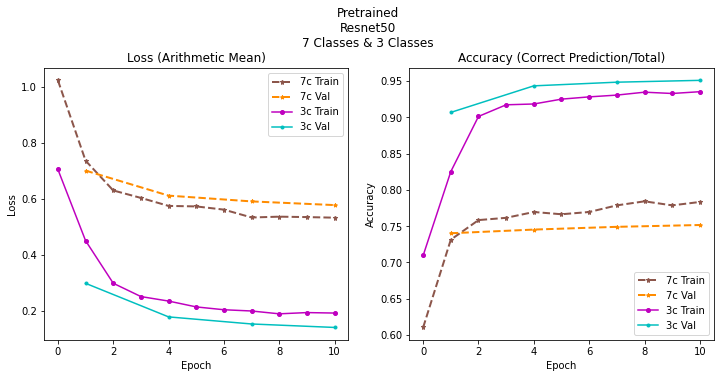

In [ ]:
r50and187class=comparePlot2(r50_7c_tra, r18_mod_3c_tra,
                            'Pretrained\nResnet50\n7 Classes & 3 Classes',
                            t1='7c', t2='3c')
r50and187class.savefig(plot_path+"/Resnet50_7class_and_3class", bbox_inches='tight')

In [ ]:
len(test3_dataset)

98

In [ ]:
print("Resnet50 3c Test 2 Confusion:\n")
_ = plot_confusionMatrix(r50_3c_t2[-1])

Resnet50 3c Test 2 Confusion:

Ground Truth & Prediction Confusion Matrix
[[ 87  53   0]
 [  0   0   0]
 [  1 139   0]]

-- Rows: Ground Truths, 
 | Columns: Predictions

Ground Truth test distribution
 0: Normal --> 140 
 1: Virus&Bacteria --> 0 
 2: Covid19 --> 140


In [ ]:
print("Pretrained Modified Resnet18, 7 Classes:\n")
print("   Kaggle Coronahack Chest XRay, Test Dataset:\n", "           Acc:", r18_mod_7c_t[0],",", "Loss:", r18_mod_7c_t[1] )
print("")
print("   Kaggle Covid19,Normal PA XRay, Test Dataset:\n", "           Acc:", r18_mod_7c_t2[0],",", "Loss:", r18_mod_7c_t2[1])

print("")
print("")

print("Pretrained Modified Resnet18, 3 Classes:\n")
print("   Kaggle Coronahack Chest XRay, Test Dataset:\n", "           Acc:", r18_mod_3c_t[0],",", "Loss:", r18_mod_3c_t[1] )
print("")
print("   Kaggle Covid19,Normal PA XRay, Test Dataset:\n", "           Acc:", r18_mod_3c_t2[0],",", "Loss:", r18_mod_3c_t2[1])

Pretrained Modified Resnet18, 7 Classes:

   Kaggle Coronahack Chest XRay, Test Dataset:
            Acc: 0.7129186602870813 , Loss: 0.8207760870456695

   Kaggle Covid19,Normal PA XRay, Test Dataset:
            Acc: 0.4785714285714286 , Loss: 2.174046198527018


Pretrained Modified Resnet18, 3 Classes:

   Kaggle Coronahack Chest XRay, Test Dataset:
            Acc: 0.7990430622009569 , Loss: 0.622595877200365

   Kaggle Covid19,Normal PA XRay, Test Dataset:
            Acc: 0.4607142857142857 , Loss: 2.160974860191345


In [ ]:
print("Pretrained Modified Resnet18, 7 Classes:\n")
print("   Kaggle Coronahack Chest XRay, Test Dataset:\n", "           Acc:", r18_mod_7c_t[0],",", "Loss:", r18_mod_7c_t[1] )
print("")
print("   Kaggle Covid19,Normal PA XRay, Test Dataset:\n", "           Acc:", r18_mod_7c_t2[0],",", "Loss:", r18_mod_7c_t2[1])


Pretrained Modified Resnet18, 7 Classes:

   Kaggle Coronahack Chest XRay, Test Dataset:
            Acc: 0.7129186602870813 , Loss: 0.8207760870456695

   Kaggle Covid19,Normal PA XRay, Test Dataset:
            Acc: 0.4785714285714286 , Loss: 2.174046198527018


In [ ]:
print("Result Model: Modified Resnet18  3c, Test Confusion:\n")
_ = plot_confusionMatrix(r18_mod_3c_main_t[-1])


Result Model: Modified Resnet18  3c, Test Confusion:

Ground Truth & Prediction Confusion Matrix
[[158  67   9]
 [ 26 361   3]
 [  0   0   3]]

-- Rows: Ground Truths, 
 | Columns: Predictions

Ground Truth test distribution
 0: Normal --> 234 
 1: Virus&Bacteria --> 390 
 2: Covid19 --> 3


In [ ]:
print("Result Model: Modified Resnet18 3c Test 2 Confusion:\n")
_ = plot_confusionMatrix(r18_mod_3c_main_t2[-1])


Result Model: Modified Resnet18 3c Test 2 Confusion:

Ground Truth & Prediction Confusion Matrix
[[138   2   0]
 [  0   0   0]
 [  1  21 118]]

-- Rows: Ground Truths, 
 | Columns: Predictions

Ground Truth test distribution
 0: Normal --> 140 
 1: Virus&Bacteria --> 0 
 2: Covid19 --> 140


In [ ]:
print("Result Model: Modified Resnet18, 3 Classes:\n")
print("   Kaggle Coronahack Chest XRay, Test Dataset:\n", "           Acc:", r18_mod_3c_main_t[0],",", "Loss:", r18_mod_3c_main_t[1] )
print("")
print("   Kaggle Covid19,Normal PA XRay, Test Dataset:\n", "           Acc:", r18_mod_3c_main_t2[0],",", "Loss:", r18_mod_3c_main_t2[1])


Result Model: Modified Resnet18, 3 Classes:

   Kaggle Coronahack Chest XRay, Test Dataset:
            Acc: 0.8325358851674641 , Loss: 0.48769268691539763

   Kaggle Covid19,Normal PA XRay, Test Dataset:
            Acc: 0.9142857142857143 , Loss: 0.3407146980365117


Result Model: Modified Resnet18 3c Test 2:
Wrong Prediction Histogram

[[ 0  2  0]
 [ 0  0  0]
 [ 1 21  0]]

-- Rows: Ground Truths, 
 | Columns: Only Wrong Predictions

Total wrong predictions:  24


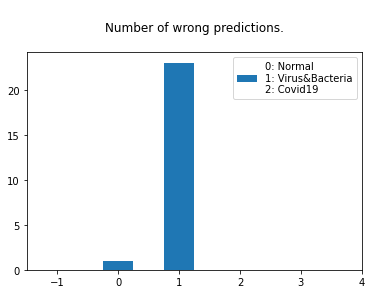

In [ ]:
print("Result Model: Modified Resnet18 3c Test 2:") 
print("Wrong Prediction Histogram\n")

plot_wrongPred(r18_mod_3c_main_t2[-1])

Result Model: Modified Resnet18 3c Test:
Wrong Prediction Histogram

[[ 0 67  9]
 [26  0  3]
 [ 0  0  0]]

-- Rows: Ground Truths, 
 | Columns: Only Wrong Predictions

Total wrong predictions:  105


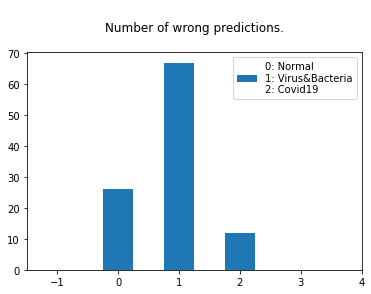

In [ ]:
print("Result Model: Modified Resnet18 3c Test:") 
print("Wrong Prediction Histogram\n")
plot_wrongPred(r18_mod_3c_main_t[-1])

Modified Resnet18 3c Test:
Wrong Prediction Histogram

[[  0 116   0]
 [  7   0   0]
 [  0   3   0]]

-- Rows: Ground Truths, 
 | Columns: Only Wrong Predictions

Total wrong predictions:  126


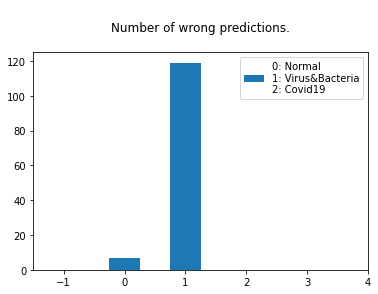

In [ ]:
print("Modified Resnet18 3c Test:") 
print("Wrong Prediction Histogram\n")
plot_wrongPred(r18_mod_3c_t[-1])

Modified Resnet18 3c Test 2:
Wrong Prediction Histogram

[[  0  11   0]
 [  0   0   0]
 [  2 138   0]]

-- Rows: Ground Truths, 
 | Columns: Only Wrong Predictions

Total wrong predictions:  151


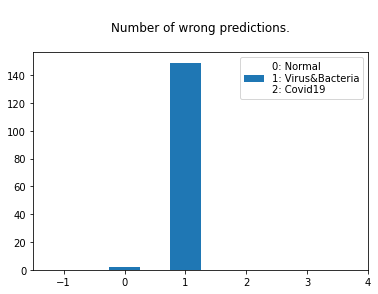

In [ ]:
print("Modified Resnet18 3c Test 2:") 
print("Wrong Prediction Histogram\n")
plot_wrongPred(r18_mod_3c_t2[-1])

In [ ]:
r50_7c_tra =historyLoad(dirname='Pre_Resnet50_7c', naming="11epoch")
r50_7c_tra
# print last two training accuracy percentage
print("50 7c:",r50_7c_tra['train_acc'][-1:-3:-1])

History must be loaded
50 7c: [0.7832962138084633, 0.7786191536748329]


In [ ]:
print("50 7c:",r50_7c_tra['val_acc'][-1:-3:-1])

r50_3c_tra =historyLoad(dirname='Pre_Resnet50_3c', naming="11epoch")
print("50 3c:",r50_3c_tra['val_acc'][-1:-3:-1])

print("")


r18_7c_tra =historyLoad(dirname='Pre_Resnet18_7c', naming="11epoch")
print("18 7c:",r18_7c_tra['val_acc'][-1:-3:-1])

r18_3c_tra =historyLoad(dirname='Pre_Resnet18_3c', naming="11epoch")
print("18 3c:",r18_3c_tra['val_acc'][-1:-3:-1])


print("")


r18_mod_7c_tra =historyLoad(dirname='Pre_Resnet18_Mod_7c', naming="11epoch")
print("18 mod 7c:",r18_mod_7c_tra['val_acc'][-1:-3:-1])

r18_mod_3c_tra =historyLoad(dirname='Pre_Resnet18_Mod_3c', naming="11epoch")
print("18 mod 3c:",r18_mod_3c_tra['val_acc'][-1:-3:-1])






History must be loaded
50 7c: [0.7515762925598991, 0.7490542244640606]
History must be loaded
50 3c: [0.926860025220681, 0.9445145018915511]

History must be loaded
18 7c: [0.6658259773013872, 0.694829760403531]
History must be loaded
18 3c: [0.9104665825977302, 0.9041614123581336]

History must be loaded
18 mod 7c: [0.7540983606557377, 0.7377049180327869]
History must be loaded
18 mod 3c: [0.9508196721311475, 0.9482976040353089]
